<a href="https://colab.research.google.com/github/dayeong9/dayeong9/blob/main/%ED%86%B5%EA%B3%84%EC%97%B0%EC%8A%B5(EDA_Part).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import scipy.stats as sci
import numpy as np
import seaborn as sns
state=pd.read_csv('state.csv')

In [3]:
from scipy.stats import trim_mean


state['Population'].mean()
trim_mean(state['Population'],0.1)

4783697.125

In [4]:
np.average(state['Murder.Rate'],weights=state['Population'])

4.445833981123393

In [12]:
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [5]:
# wquantiles 패키지 설치
!pip install wquantiles

# 모듈 임포트
from wquantiles import median

# 모듈 사용
median(state['Murder.Rate'], weights=state['Population'])

4.4

In [6]:
# statsmodels 패키지 설치
!pip install statsmodels

# 모듈 임포트
from statsmodels import robust

state['Population'].std()
state['Population'].quantile(0.75)-state['Population'].quantile(0.25)
robust.scale.mad(state['Population'])

3849876.1459979336

In [7]:
state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

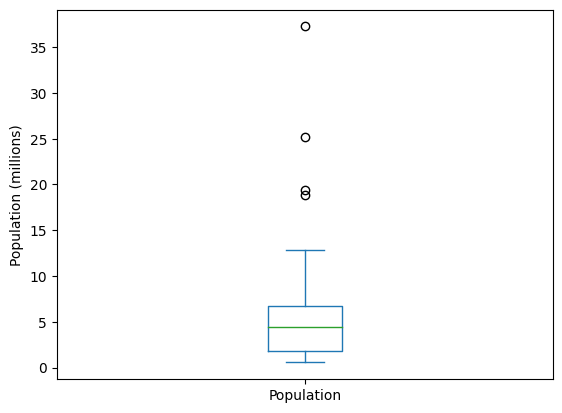

In [8]:
import matplotlib.pyplot as plt

# 상자 그림 그리기
ax = (state['Population'] / 1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

plt.show()

In [9]:
binnedPopulation=pd.cut(state['Population'],10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

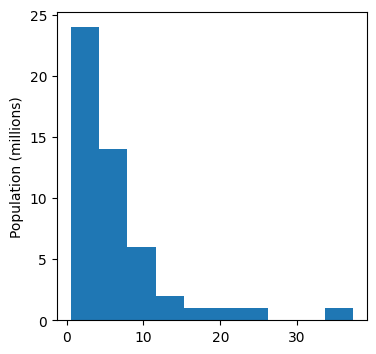

In [10]:
# 히스토그램 그림 그리기
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4,4))
ax.set_ylabel('Population (millions)')

plt.show()

Text(0.5, 0, 'Murder Rate(per 100,000)')

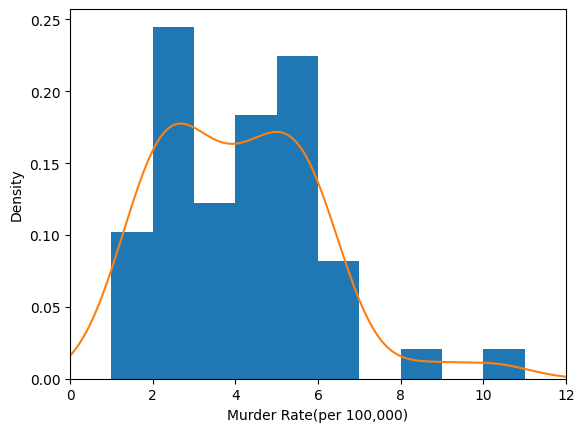

In [11]:
# 밀도 그림
ax=state['Murder.Rate'].plot.hist(density=True, xlim=[0,12],bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate(per 100,000)')

In [19]:
murder_avg=state.groupby('State')['Murder.Rate'].mean()
murder_avg

State
Alabama            5.7
Alaska             5.6
Arizona            4.7
Arkansas           5.6
California         4.4
Colorado           2.8
Connecticut        2.4
Delaware           5.8
Florida            5.8
Georgia            5.7
Hawaii             1.8
Idaho              2.0
Illinois           5.3
Indiana            5.0
Iowa               1.9
Kansas             3.1
Kentucky           3.6
Louisiana         10.3
Maine              1.6
Maryland           6.1
Massachusetts      2.0
Michigan           5.4
Minnesota          1.6
Mississippi        8.6
Missouri           6.6
Montana            3.6
Nebraska           2.9
Nevada             6.0
New Hampshire      0.9
New Jersey         3.9
New Mexico         4.8
New York           3.1
North Carolina     5.1
North Dakota       3.0
Ohio               4.0
Oklahoma           4.5
Oregon             2.0
Pennsylvania       4.8
Rhode Island       2.4
South Carolina     6.4
South Dakota       2.3
Tennessee          5.7
Texas              4.4
Utah 

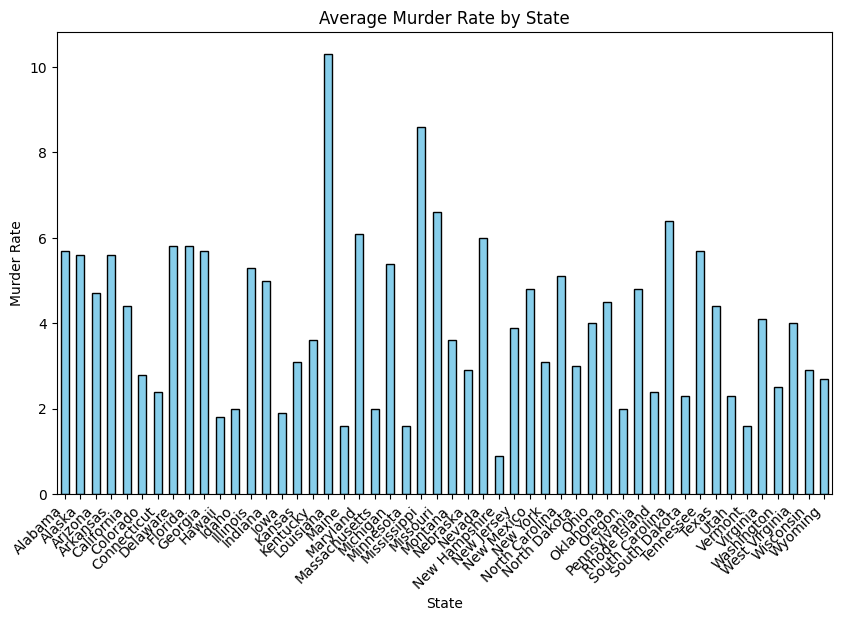

In [20]:
# 막대그래프
murder_avg.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

plt.title('Average Murder Rate by State')
plt.xlabel('State')
plt.ylabel('Murder Rate')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전 및 정렬

plt.show()

Text(0, 0.5, 'Population')

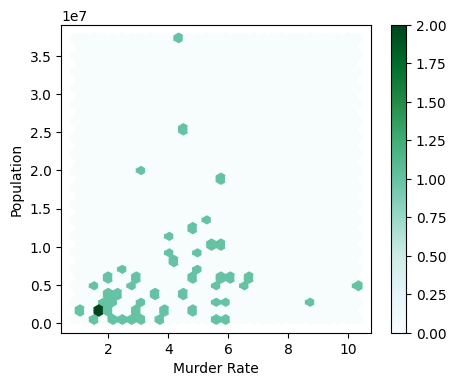

In [22]:
# 육각형 그림(수치형-수치형)
ax=state.plot.hexbin(x='Murder.Rate',y='Population',
                     gridsize=30,sharex=False,figsize=(5,4))
ax.set_xlabel('Murder Rate')
ax.set_ylabel('Population')

Text(0, 0.5, 'Population')

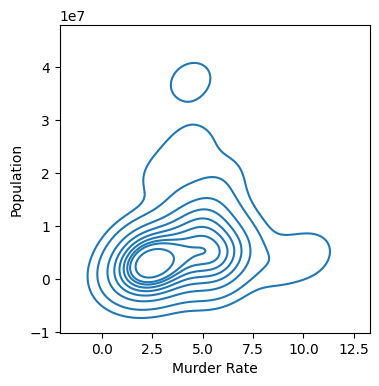

In [24]:
#등고선 그림(수치형-수치형)
fig,ax=plt.subplots(figsize=(4,4))
ax=sns.kdeplot(data=state,x='Murder.Rate',y='Population',ax=ax)
ax.set_xlabel('Murder Rate')
ax.set_ylabel('Population')

In [28]:
state.sort_values('Murder.Rate',ascending=False)

,State,Population,Murder.Rate,Abbreviation
17,Louisiana,4533372,10.3,LA
23,Mississippi,2967297,8.6,MS
24,Missouri,5988927,6.6,MO
39,South Carolina,4625364,6.4,SC
19,Maryland,5773552,6.1,MD
27,Nevada,2700551,6.0,NV
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
0,Alabama,4779736,5.7,AL
9,Georgia,9687653,5.7,GA


Text(0.5, 0.98, '')

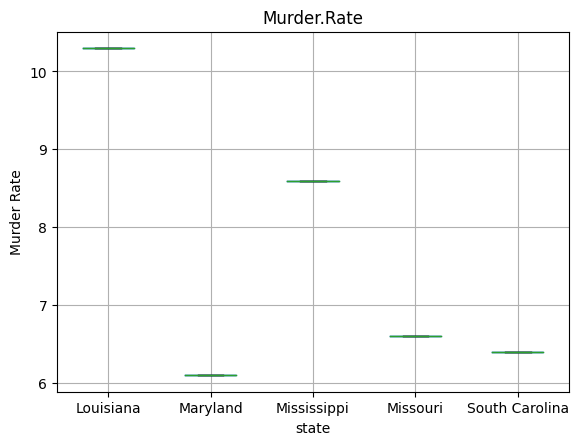

In [38]:
#인구가중치 적용 평균이상 주 상자그림

# Murder.Rate 상위 10%에 해당하는 값을 얻기
threshold = state['Murder.Rate'].quantile(0.9)
state_top_10 = state[state['Murder.Rate'] >= threshold]


ax=state_top_10.boxplot(by='State',column='Murder.Rate')
ax.set_ylabel('Murder Rate')
ax.set_xlabel('state')
plt.suptitle('')